In [35]:
import geopandas as gpd
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'The whole world')

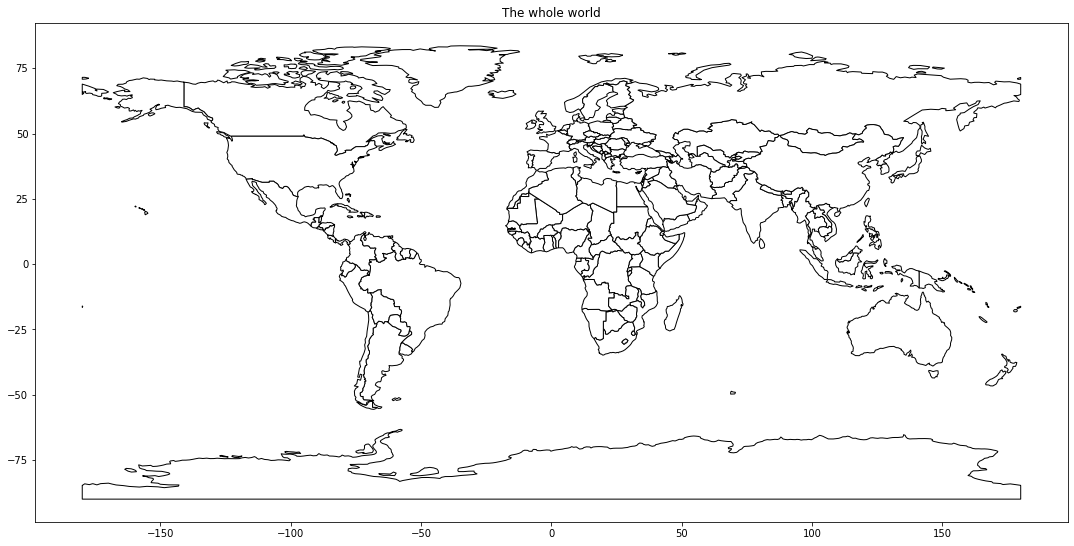

In [36]:
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_df.plot(color='white', edgecolor='black')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('The whole world')

Text(0.5, 1.0, 'USA')

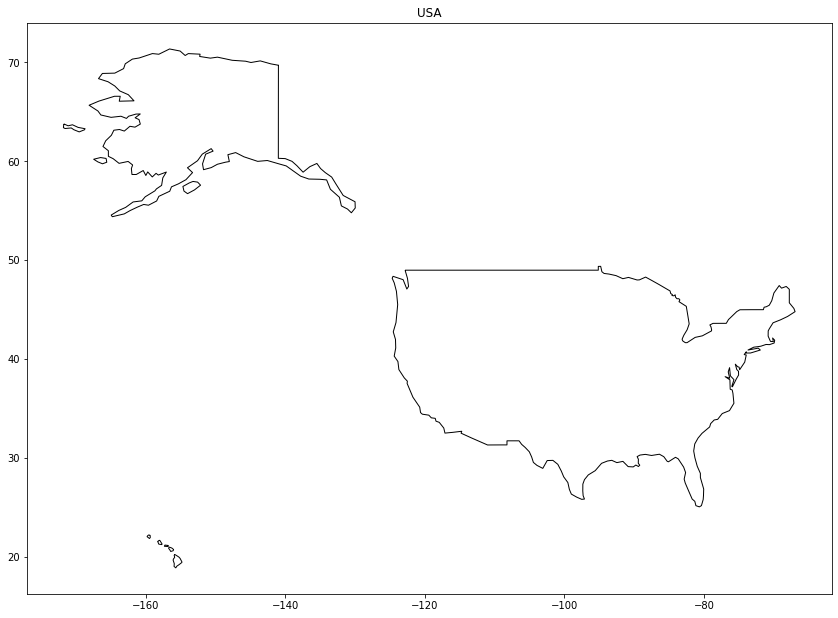

In [37]:
usa_df = world_df[world_df["iso_a3"] == 'USA']
usa_df.plot(color='white', edgecolor='black')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('USA')

In [38]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
tiles_df = gpd.read_file('output/covering_tiles.kml', driver='KML', crs='EPSG:4326')
print(tiles_df)

         Name Description                                           geometry
0       10UGU              POLYGON Z ((-120.28118 48.72093 0.00000, -118....
1       11TLN              POLYGON Z ((-119.67207 47.82260 0.00000, -118....
2       11ULP              POLYGON Z ((-119.71936 48.72091 0.00000, -118....
3       10UGU              POLYGON Z ((-120.28118 48.72093 0.00000, -118....
4       11TLN              POLYGON Z ((-119.67207 47.82260 0.00000, -118....
...       ...         ...                                                ...
301998  56JNQ              POLYGON Z ((152.99980 -27.12247 0.00000, 154.1...
301999  56JNQ              POLYGON Z ((152.99980 -27.12247 0.00000, 154.1...
302000  56JNQ              POLYGON Z ((152.99980 -27.12247 0.00000, 154.1...
302001  56JNQ              POLYGON Z ((152.99980 -27.12247 0.00000, 154.1...
302002  56JNQ              POLYGON Z ((152.99980 -27.12247 0.00000, 154.1...

[302003 rows x 3 columns]


In [42]:
join = gpd.sjoin(tiles_df, usa_df, how="inner", op='intersects')
join_tiles = join[["Name", "geometry"]]
join_tiles = join_tiles.drop_duplicates()
print(len(join_tiles), 'tiles in join')

509 tiles in join


Text(0.5, 1.0, 'Tiles in the USA: 509')

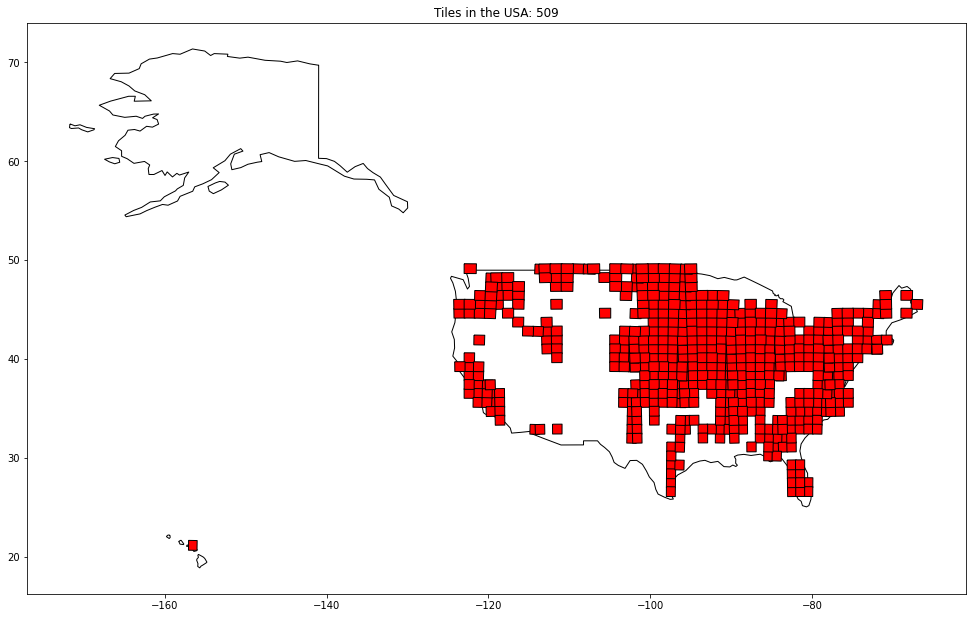

In [43]:
ax = usa_df.plot(color='white', edgecolor='black')
join_tiles.plot(color='red', edgecolor='black', ax=ax)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title(f'Tiles in the USA: {len(join_tiles)}')